In [90]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [110]:
df = pd.read_csv("A2_data.csv")

In [111]:
# drop row 79543
df = df.drop(79543, axis=0)

In [112]:
df.head()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,56064,-0.001584,854,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,53727,-0.824700,3292,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,54883,-0.418000,5888,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,51783,5.953000,536,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,56069,0.846000,9427,GALAXY


In [113]:
scaler = StandardScaler()

# labels =df['class']
labels = df['class']
df['class'] = df['class'].map({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
df = df.drop(['class','field_ID','plate','MJD'], axis=1)

# scale the data
df_scaled = scaler.fit_transform(df)

# convert the scaled data to a dataframe
df = pd.DataFrame(df_scaled, columns=df.columns)

In [114]:
df.head()

,alpha,delta,u,g,r,i,z,redshift
0,-0.434597,0.425517,0.798798,0.806782,0.403953,0.046001,0.013999,-0.000981
1,-0.339915,0.363391,1.198064,1.079967,1.584395,1.185087,1.611170,-0.275109
2,-0.367244,0.582702,1.413732,0.997513,0.519736,0.150012,0.101520,-0.139663
3,1.669522,-1.249122,0.024940,1.543642,1.059894,0.807601,0.272435,1.982117
4,1.737308,-0.150255,-1.174337,-1.497665,-1.697426,-1.767888,-1.825836,0.281296


In [115]:
features = df
key=features.keys()

In [116]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=123, stratify=labels)


In [8]:
clf = AdaBoostClassifier(random_state=123)

In [35]:
parameters = {
    'n_estimators': [5,10,20,30,50,70],
    'learning_rate': [0.1,0.3,0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']
}
gr_ada = GridSearchCV(clf, parameters, cv=5, verbose=2, n_jobs=-1)
gr_ada.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', n_estimators=30),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
                         'n_estimators': [5, 10, 20, 30, 50, 70]},
             verbose=2)

In [36]:
gr_ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 70}

In [117]:
clf = AdaBoostClassifier(
    algorithm = 'SAMME.R',
    learning_rate = 0.8,
    n_estimators = 70
)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=70)

In [27]:
#Best Parameters
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
print(f' Scores for each fold are: {cross_score}')
print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

 Scores for each fold are: [0.7652     0.7756     0.7714     0.7753     0.77498875]
 Average score: 0.77


In [28]:
clf = AdaBoostClassifier(
    algorithm = 'SAMME.R',
    learning_rate = 0.8,
    n_estimators = 1
)
clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=1)

In [29]:
#Experiment 1
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(clf,features,labels,cv = 5,scoring = "accuracy")
print(f' Scores for each fold are: {cross_score}')
print(f' Average score: {"{:.2f}".format(cross_score.mean())}')

 Scores for each fold are: [0.6434     0.63805    0.658      0.6471     0.64253213]
 Average score: 0.65


In [118]:
y_pred = clf.predict(x_test)
sortedlabels = clf.classes_

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.83      0.93      0.87     17834
         QSO       0.69      0.76      0.72      5688
        STAR       0.65      0.38      0.48      6478

    accuracy                           0.78     30000
   macro avg       0.72      0.69      0.69     30000
weighted avg       0.76      0.78      0.76     30000

[[16509   555   770]
 [  822  4336   530]
 [ 2628  1400  2450]]


Text(43.25, 0.5, 'True')

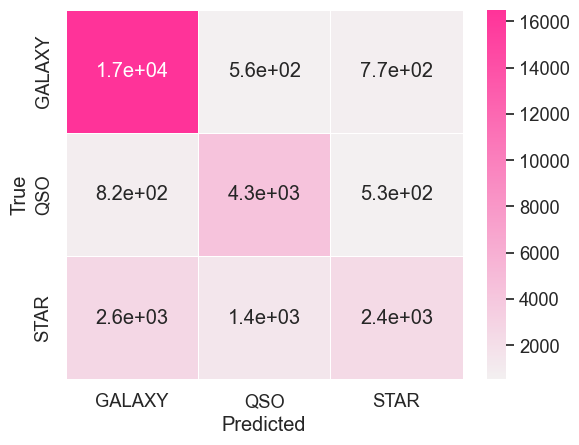

In [120]:
cm = pd.DataFrame(cm, index=sortedlabels, columns=sortedlabels)
sns.set(font_scale=1.2)
sns.heatmap(cm, linewidths=0.5, cmap=sns.light_palette((1, 0.2, 0.6),n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')